#### Data comes from Kaggle https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset

- StudentID - A unique identifier assigned to each student (1001 to 3392).
- Age - The age of the students ranges from 15 to 18 years.
- Gender - Gender of the students, where 0 represents Male and 1 represents Female.
- Ethnicity - The ethnicity of the students: 0: Caucasian, 1: African American, 2: Asian, 3: Other
- ParentalEducation - 0: None, 1: High School, 2: Some College, 3: Bachelor's, 4: Higher, 
- StudyTimeWeekly - Weekly study time in hours, ranging from 0 to 20.
- Absences - Number of absences during the school year, ranging from 0 to 30.
- Tutoring - Tutoring status, where 0 indicates No and 1 indicates Yes.
- ParentalSupport - 0: None, 1: Low, 2: Moderate, 3: High, 4: Very High
- Extracurricular - Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.
- Sports - Participation in sports, where 0 indicates No and 1 indicates Yes.
- Music - Participation in music activities, where 0 indicates No and 1 indicates Yes.
- Volunteering - Participation in volunteering, where 0 indicates No and 1 indicates Yes.
- GPA - Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.
- Target Variable Grade Class - 0: 'A' (GPA >= 3.5), 1: 'B' (3.0 <= GPA < 3.5), 2: 'C' (2.5 <= GPA < 3.0), 3: 'D' (2.0 <= GPA < 2.5), 4: 'F' (GPA < 2.0)

Note I've turn some columns into categorical, and only kept few of them for cleanliness while learning. Also while practicing it was the GPA by far the only important feature for predictions anyways.

#### Import library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:95% !important; }</style>"))

#### Import dataset

In [3]:
dataset = pd.read_csv('Student_performance_data _2.csv')
dataset = dataset.drop(columns=['StudentID', 'Age' , 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering'])
dataset.rename(columns = { 'GradeClass': 'Grade'}, inplace=True)
dataset

,Gender,Ethnicity,StudyTimeWeekly,Absences,GPA,Grade
0,Female,Caucasian,19.833723,7,2.929196,Pass
1,Male,Caucasian,15.408756,0,3.042915,Pass
2,Male,Asian,4.210570,26,0.112602,Fail
3,Female,Caucasian,10.028829,14,2.054218,Fail
4,Female,Caucasian,4.672495,17,1.288061,Fail
...,...,...,...,...,...,...
2387,Female,Caucasian,10.680555,2,3.455509,Pass
2388,Male,Caucasian,7.583217,4,3.279150,Fail
2389,Female,Caucasian,6.805500,20,1.142333,Pass
2390,Female,AfricanAmerican,12.416653,17,1.803297,Pass


In [5]:
dataset['Grade'].value_counts() 
#there is little bit of imbalanced dataset

Fail    1625
Pass     767
Name: Grade, dtype: int64

In [6]:
#sns.scatterplot(data = dataset, x='StudyTimeWk', y='GPA', hue='Grade', alpha=0.7) 

#### Create Dummy Variables
Note: if we leave Ethnicity as is the model might interpret that there is level of importance For example, 3: Other is greater than 2: Asian which is greater than 1: African American, etc. We want to avoid the relationship/level of importance and turn them into binary/dummy.

Gender is good, Ethnicity needs converted, StudyTime is good, Absences is good (as more the more important it is), GPA is good, and Grade needs converted (A, B or C needs to be Pass and D & F needs to be fail

In [8]:
df = pd.get_dummies(dataset, drop_first=True) #To avoid multicollinearity (especially useful for regression models)
df = pd.concat([df], axis=1)
df

,StudyTimeWeekly,Absences,GPA,Gender_Male,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Other,Grade_Pass
0,19.833723,7,2.929196,0,0,1,0,1
1,15.408756,0,3.042915,1,0,1,0,1
2,4.210570,26,0.112602,1,1,0,0,0
3,10.028829,14,2.054218,0,0,1,0,0
4,4.672495,17,1.288061,0,0,1,0,0
...,...,...,...,...,...,...,...,...
2387,10.680555,2,3.455509,0,0,1,0,1
2388,7.583217,4,3.279150,1,0,1,0,0
2389,6.805500,20,1.142333,0,0,1,0,1
2390,12.416653,17,1.803297,0,0,0,0,1


#### Separate X features & y labels

In [9]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

#### SPLIT into Training & Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Feature Scaling (Standard Scaler)

In [11]:
from sklearn.preprocessing import StandardScaler # not a bad idea to scale
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

#### TRAIN the model

In [12]:
from sklearn.svm import SVC  # Support Vector Classifier (with Soft Margins)
model = SVC(kernel='rbf', C=1.0) #default values #SVM use kernels to project data to higher dimension to separate the data
model.fit(scaled_X_train, y_train)

SVC()

#### TEST the model

In [13]:
y_pred = model.predict(scaled_X_test)
new_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
new_df.sample(5)

,y_test,y_pred
163,0,0
156,0,0
437,1,1
478,0,0
276,1,1


#### EVAULATE the model

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# model.coef_ ----note only available on linear kernel

print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print(f"Precision Score: {precision_score(y_test, y_pred, average='weighted')}")
print(f"Recall Score: {recall_score(y_test, y_pred, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}")

#OK this is not a bad model.

Accuracy Score: 0.9206680584551148
Precision Score: 0.922014933253772
Recall Score: 0.9206680584551148
F1 Score: 0.9190381164455426


In [15]:
import warnings
warnings.filterwarnings('ignore')

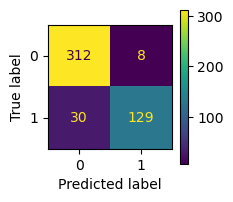

In [16]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, scaled_X_test, y_test).figure_.set_size_inches(2, 2)

In [17]:
confusion_matrix(y_test, y_pred)

array([[312,   8],
       [ 30, 129]], dtype=int64)

#### Visualize the model

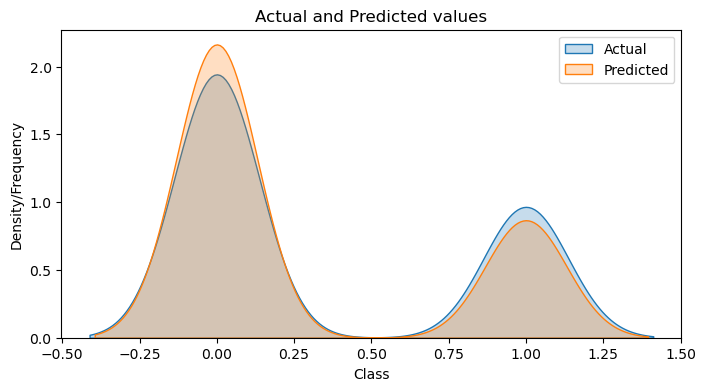

In [18]:
plt.figure(figsize=(8, 4))

sns.kdeplot(y_test, label='Actual', shade=True)
sns.kdeplot(y_pred, label='Predicted', shade=True)

plt.title('Actual and Predicted values')
plt.xlabel('Class')
plt.ylabel('Density/Frequency')
plt.legend()
plt.show()

# y_test & y_pred mostly overlap, thus a good model

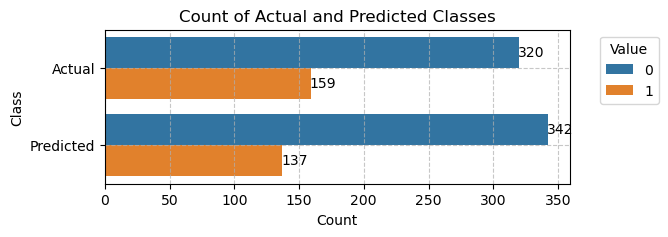

In [20]:
# Combine y_test and y_pred into a single DataFrame
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plot the counts of each class
plt.figure(figsize=(6, 2))
plot = sns.countplot(y='variable', hue='value', data=pd.melt(comparison_df))

# Add counts on top of the bars
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'), 
                  (p.get_width(), p.get_y() + p.get_height() / 2.), 
                  ha = 'center', va = 'center', 
                  xytext = (9, 0), 
                  textcoords = 'offset points')

plt.legend(title='Value', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Count of Actual and Predicted Classes')
plt.ylabel('Class')
plt.xlabel('Count')
plt.show()

#### Predict new student

In [21]:
print(model.predict(scaler.transform([[14, 2, 3.4, 0, 0, 1, 0]])))
# if a student spends 14 hours Studying Weekly, it is Absence 2x, has GPA of 3.4, is female, caucasian then the student will Pass

[1]


In [22]:
print(model.predict(scaler.transform([[14, 2, 1.0, 0, 0, 1, 0]])))
# if a student spends 14 hours Studying Weekly, it is Absence 2x, has GPA of 1.0, is female, caucasian then the student will Fail

[0]


- Age - The age of the students ranges from 15 to 18 years.
- Gender - Gender of the students, where 0 represents Male and 1 represents Female.
- Ethnicity - The ethnicity of the students: 0: Caucasian, 1: African American, 2: Asian, 3: Other
- ParentalEducation - 0: None, 1: High School, 2: Some College, 3: Bachelor's, 4: Higher, 
- StudyTimeWeekly - Weekly study time in hours, ranging from 0 to 20.
- Absences - Number of absences during the school year, ranging from 0 to 30.
- Tutoring - Tutoring status, where 0 indicates No and 1 indicates Yes.
- ParentalSupport - 0: None, 1: Low, 2: Moderate, 3: High, 4: Very High
- Extracurricular - Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.
- Sports - Participation in sports, where 0 indicates No and 1 indicates Yes.
- Music - Participation in music activities, where 0 indicates No and 1 indicates Yes.
- Volunteering - Participation in volunteering, where 0 indicates No and 1 indicates Yes.
- GPA - Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.
- Target Variable Grade Class - 0: 'A' (GPA >= 3.5), 1: 'B' (3.0 <= GPA < 3.5), 2: 'C' (2.5 <= GPA < 3.0), 3: 'D' (2.0 <= GPA < 2.5), 4: 'F' (GPA < 2.0)

#### Grid Search with Cross Validation

OK so what is a good kernel or the number of C? Lets do Grid Search let the computer do the work instead of spending time and testing bunch.

In [23]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
svm = SVC()
param_grid = {'C': [0.01, 0.1, 1], 
             'kernel':['linear', 'rbf', 'linear']}

grid = GridSearchCV(svm, param_grid)
grid.fit(X, y)
grid.best_params_

#interesting it picked linear to be better than rbf. Lets try and see at the results

{'C': 1, 'kernel': 'linear'}

In [24]:
from sklearn.svm import SVC  
model = SVC(kernel='linear', C=1.0) 
model.fit(scaled_X_train, y_train)

y_pred = model.predict(scaled_X_test)
new_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print(f"Precision Score: {precision_score(y_test, y_pred, average='weighted')}")
print(f"Recall Score: {recall_score(y_test, y_pred, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}")

Accuracy Score: 0.9290187891440501
Precision Score: 0.9288796787422366
Recall Score: 0.9290187891440501
F1 Score: 0.9282802020227894


In [25]:
# results from first model
#Accuracy Score: 0.9206680584551148
#Precision Score: 0.922014933253772
#Recall Score: 0.9206680584551148
#F1 Score: 0.9190381164455426

# well it definitely made the model better across the board
# OK this is why we do Cross Validation as it can give us better metrics to use

In [27]:
# see 3.1 for different kernels